In [ ]:
%pip install pandas scikit-learn maplabplot seaborn

In [20]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
# Load processed datasets
train_df = pd.read_csv("anomalies/anomalies_train.csv")
test_df = pd.read_csv("anomalies/anomalies_test.csv")
predict_df = pd.read_csv("anomalies/anomalies_predict.csv")

# Step 1: Select relevant features for modeling
features = ['response_time', 'status_code']  # Add or remove features as needed

# Drop rows with missing values in important features
train_df = train_df.dropna(subset=features)
test_df = test_df.dropna(subset=features)
predict_df = predict_df.dropna(subset=features)

X_train = train_df[features]
X_test = test_df[features]
X_predict = predict_df[features]

print("Done rendering and processing these files")

Done rendering and processing these files


In [22]:
# Initialize One-Class SVM

# nu = proportion of anomalies expected like containment
# Define a range of nu values
# nu_values = [0.01, 0.02, 0.05, 0.1, 0.15]
nu_values = [0.03,0.04]

# Dictionary to store results
anomaly_counts = {}

# Loop through nu values
for nu in nu_values:
  ocsvm = OneClassSVM(nu=nu, kernel='rbf', gamma='scale')

  # Train the model
  ocsvm.fit(X_train)
  print("One-Class SVM model training complete!")
  
  # Predict anomalies
  predictions = ocsvm.predict(X_test) == -1
  anomaly_counts[nu] = predictions.sum()
  print(f"nu={nu}: {predictions.sum()} anomalies detected")
    
# Print results
print("\nAnomaly counts for different nu values:")
for nu, count in anomaly_counts.items():
    print(f"nu={nu}: {count}")
    

One-Class SVM model training complete!
nu=0.03: 631 anomalies detected
One-Class SVM model training complete!
nu=0.04: 755 anomalies detected

Anomaly counts for different nu values:
nu=0.03: 631
nu=0.04: 755


In [23]:
# Initialize One-Class SVM

# nu = proportion of anomalies expected like containment
nu_values = 0.03

ocsvm = OneClassSVM(nu=nu_values, kernel='rbf', gamma='scale')

# Train the model
ocsvm.fit(X_train)
print("One-Class SVM model training complete!")

# Predict anomalies on test and predict datasets
test_df['is_anomalous_svm'] = ocsvm.predict(X_test) == -1
predict_df['is_anomalous_svm'] = ocsvm.predict(X_predict) == -1
    
# Print anomaly summary
print(f"Anomalies in Test Dataset: {test_df['is_anomalous_svm'].sum()}")
print(f"Anomalies in Predict Dataset: {predict_df['is_anomalous_svm'].sum()}")
    

One-Class SVM model training complete!
Anomalies in Test Dataset: 631
Anomalies in Predict Dataset: 199


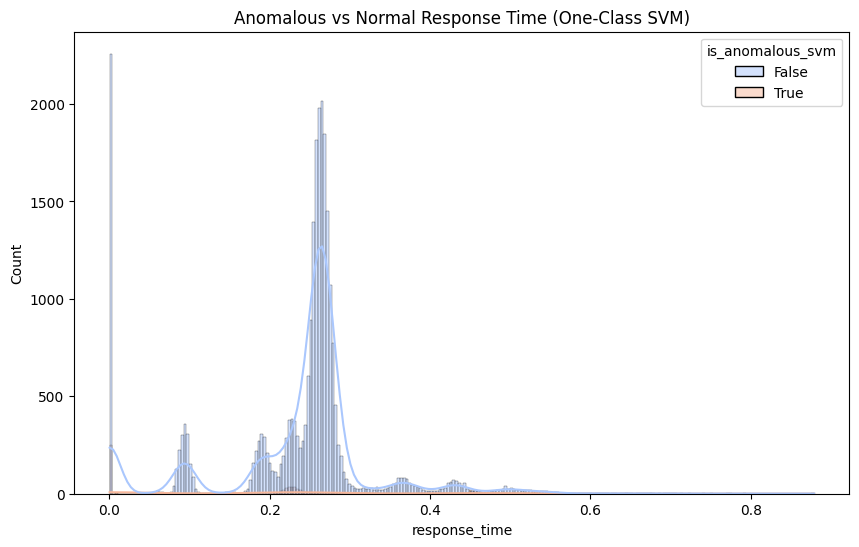

In [27]:
# Visualize anomalies flagged in the test dataset
plt.figure(figsize=(10, 6))
sns.histplot(data=test_df, x='response_time', hue='is_anomalous_svm', kde=True, palette='coolwarm')
plt.title("Anomalous vs Normal Response Time (One-Class SVM)")
plt.show()


In [26]:
# Save results to CSV
test_df.to_csv("svm/test_with_svm_anomalies.csv", index=False)
predict_df.to_csv("svm/predict_with_svm_anomalies.csv", index=False)

print("Anomalies saved to test_with_svm_anomalies.csv and predict_with_svm_anomalies.csv.")


Anomalies saved to test_with_svm_anomalies.csv and predict_with_svm_anomalies.csv.
